In [1]:
# This project analyses Titanic dataset download from Kaggle
# Answer following questions:
#1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
#2.) What deck were the passengers on and how does that relate to their class?
#3.) Where did the passengers come from?
#4.) Who was alone and who was with family?
#5.) What factors helped someone survive the sinking?

In [1]:
#Import pandas
import pandas as pd
from pandas import Series,DataFrame

In [2]:
# Set up the Titanic csv file as a DataFrame
titanic_df=pd.read_csv('train.csv')

# Preview the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Get overall info for the dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
# Import tools for analysis and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

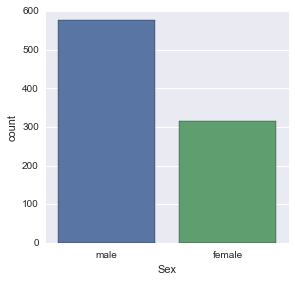

In [7]:
#1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
# First check gender
sns.factorplot(x="Sex",data=titanic_df,kind='count')

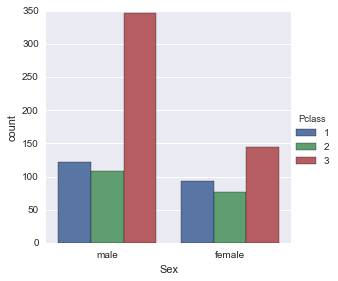

In [8]:
# Seperate the genders by classes
sns.factorplot('Sex',data=titanic_df,hue='Pclass',kind='count')

In [9]:
# Treat anyone as under 16 as a child, and then use the apply technique with a function to create a new column "person"

# First make a function to sort through the sex 
def male_female_child(passenger):
    # Take the Age and Sex
    age,sex = passenger
    # Compare the age, otherwise leave the sex
    if age < 16:
        return 'child'
    else:
        return sex
    

# Define a new column called 'person', remember to specify axis=1 for columns and not index
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [10]:
titanic_df[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


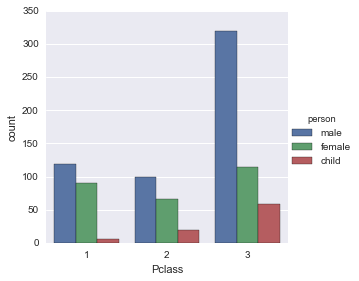

In [11]:
# Seperate the Pclass by person
sns.factorplot('Pclass',data=titanic_df,hue='person',kind='count')

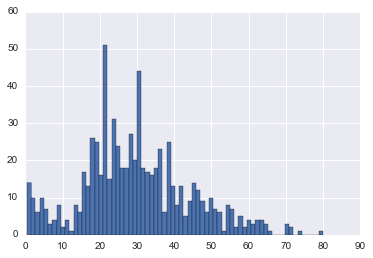

In [12]:
# Quick way to create a histogram using pandas for age
titanic_df['Age'].hist(bins=70)

In [13]:
# Get the mean of age
titanic_df['Age'].mean()

29.69911764705882

In [14]:
# Get a quick overall comparison of male,female,child
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

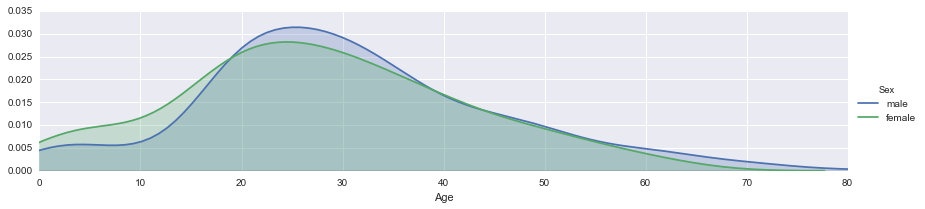

In [15]:
# Use FacetGrid to plot multiple kedplots on one plot
# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)

# Use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade=True)

# Set the x max limit by the oldest passenger
oldest = titanic_df['Age'].max()

# No one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Add a legend
fig.add_legend()

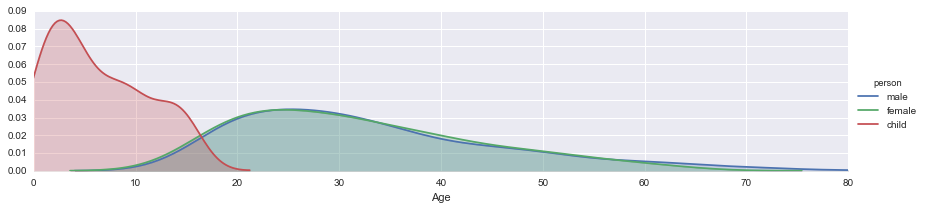

In [16]:
# Another plot includes children:
fig = sns.FacetGrid(titanic_df,hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))
fig.add_legend()

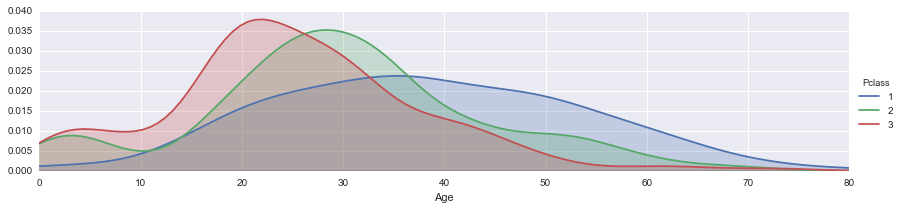

In [17]:
# Another plot for class by changing the hue argument:
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))
fig.add_legend()

In [18]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [19]:
#2.) What deck were the passengers on and how does that relate to their class?
# Drop the NaN values and create a new object, deck
deck=titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

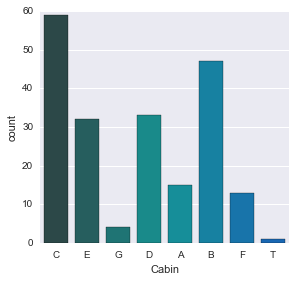

In [20]:
# Grab the first letter of the deck to classify its level (e.g. A,B,C,D,E,F,G)
# Set a empty list

levels =[]

# Loop to grab first letter
for level in deck:
    levels.append(level[0])    

# Reset DataFrame and use factor plot
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']


sns.factorplot('Cabin',data=cabin_df,palette='winter_d',kind='count')

In [25]:
# Redefine cabin_df as everything but where the row was equal to 'T'
cabin_df = cabin_df[cabin_df.Cabin !='T']

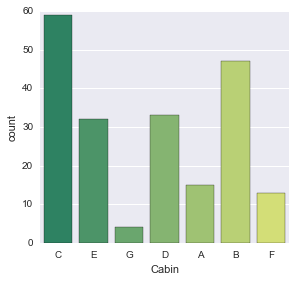

In [23]:
# Change palette names
# More palette Link: http://matplotlib.org/users/colormaps.html
sns.factorplot('Cabin',data=cabin_df,palette='summer',kind='count')

In [26]:
# Review original data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


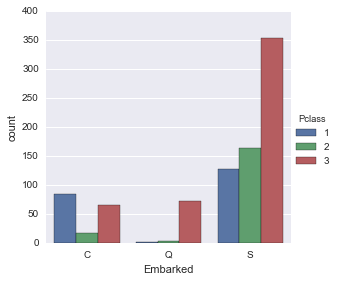

In [30]:
# 3.) Where did the passengers come from?
# Factorplot Embarked by Pclass
sns.factorplot('Embarked',data=titanic_df,hue='Pclass',order=['C','Q','S'],kind='count')

In [32]:
#4.) Who was alone and who was with family?
# First,adding a new column to define alone: add the parent/child column with the sibsp column
titanic_df['alone']=titanic_df.SibSp + titanic_df.Parch
titanic_df['alone'][:10]

0    1
1    1
2    0
3    1
4    0
5    0
6    0
7    4
8    2
9    1
Name: alone, dtype: int64

In [33]:
# Check >0 or ==0 to set alone status
titanic_df['alone'].loc[titanic_df['alone']>0] ='With Family'
titanic_df['alone'].loc[titanic_df['alone']==0] ='Alone'

D:\Program Files (x86)\ANACONDA\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [34]:
# Check to make sure it worked
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


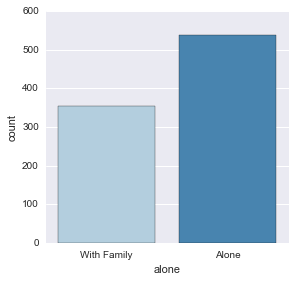

In [39]:
# A simple visualization of alone status
sns.factorplot('alone',data=titanic_df,palette='Blues',kind='count')

In [40]:
#5.) What factors helped someone survive the sinking?
# Create a new column of survivor
titanic_df["Survivor"] = titanic_df.Survived.map({0: "no", 1: "yes"})



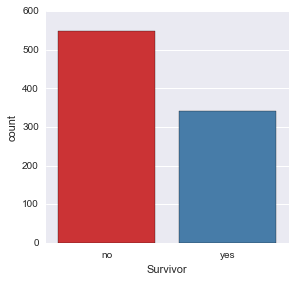

In [41]:
# A quick overall view of survied vs died. 
sns.factorplot('Survivor',data=titanic_df,palette='Set1',kind='count')

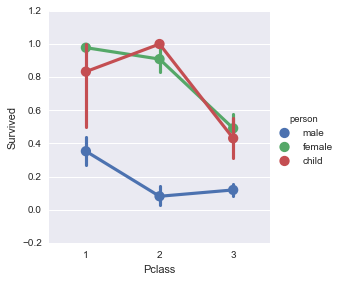

In [44]:
# Factor plot for survive status by pclass and person 
sns.factorplot('Pclass','Survived',hue='person',data=titanic_df)

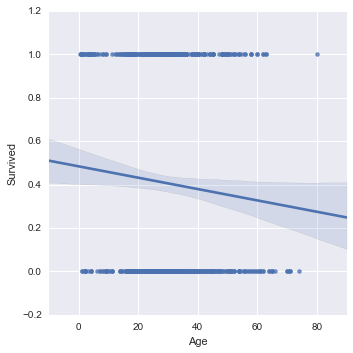

In [45]:
# A linear plot on age versus survival
sns.lmplot('Age','Survived',data=titanic_df)

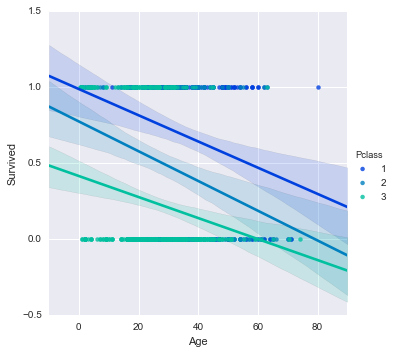

In [47]:
# A linear plot on age versus survival
sns.lmplot('Age','Survived', hue='Pclass',data=titanic_df,palette='winter')

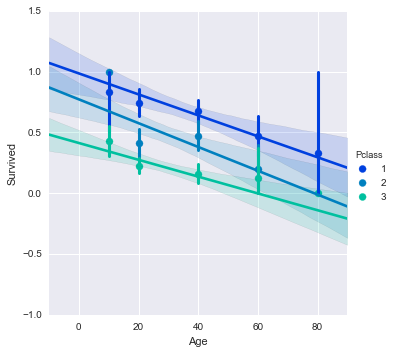

In [48]:
# Use a linear plot on age versus survival using hue for class seperation
# Make age bins
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter',x_bins=generations)

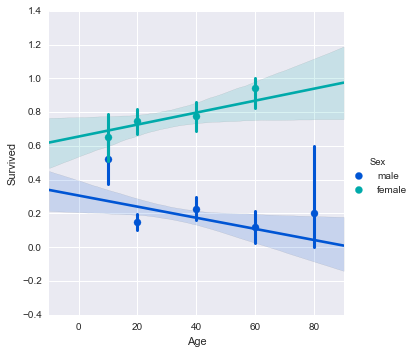

In [49]:
# Since the interesting find on the older 1st class passengers, check gender and age with the survival status for more information
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)